In [10]:
#Step1
import pandas as pd

# File paths
historical_data_2023_path = r'E:\Data_Practice\xrp_rate_custom_2023-01-01_to_2024-01-01.csv'
historical_data_2024_path = r'E:\Data_Practice\xrp_rate_custom_2024-01-01_to_2024-10-21.csv'
current_day_data_path = r'E:\Data_Practice\xrp_rates_live.csv'

# Load Historical Data (last 2 years)
try:
    historical_data_2023 = pd.read_csv(historical_data_2023_path, parse_dates=['Timestamp'])
except FileNotFoundError:
    print("File for 2023 data not found. Please check the file path.")
    historical_data_2023 = None

try:
    historical_data_2024 = pd.read_csv(historical_data_2024_path, parse_dates=['Timestamp'])
except FileNotFoundError as e:
    print(f"Error loading 2024 data: {e}")
    historical_data_2024 = None

# Load Current Day Data
try:
    current_day_data = pd.read_csv(current_day_data_path, parse_dates=['Timestamp'])
except FileNotFoundError as e:
    print(f"Error loading current day data: {e}")
    current_day_data = None

# Combine Historical and Current Day data
if historical_data_2023 is not None and historical_data_2024 is not None and current_day_data is not None:
    data = pd.concat([historical_data_2023, historical_data_2024, current_day_data])
    data = data.sort_values(by='Timestamp').reset_index(drop=True)
    print(data.head())  # Display the first few rows to verify

    # Save combined data to a new CSV file
    combined_file_path = r'E:\Data_Practice\combined_xrp_data.csv'
    data.to_csv(combined_file_path, index=False)
    print(f"Combined data saved to {combined_file_path}")
else:
    print("Error combining data: One or more datasets are not loaded.")


            Timestamp  XRP Price
0 2023-01-01 00:00:00     0.3428
1 2023-01-01 00:01:00     0.3427
2 2023-01-01 00:02:00     0.3428
3 2023-01-01 00:03:00     0.3429
4 2023-01-01 00:04:00     0.3429
Combined data saved to E:\Data_Practice\combined_xrp_data.csv


In [12]:
#Step 2
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 2: Handling missing values (if any)
data.ffill(inplace=True)  # Forward fill missing values

# Extract only the XRP Price (target) column
prices = data['XRP Price'].values.reshape(-1, 1)  # Change to match your column name

# Scale the prices to a range between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Create sequences (e.g., 60 minutes of history to predict the next minute)
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 60  # Using last 60 minutes to predict the next one
X, y = create_sequences(scaled_prices, time_steps)

# Optional: Check the shape of the input and output data
print("Input shape:", X.shape)
print("Output shape:", y.shape)


Input shape: (951756, 60, 1)
Output shape: (951756, 1)


In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is already loaded and contains the 'XRP Price' column

# Step 2: Handling missing values (if any)
data.ffill(inplace=True)  # Forward fill missing values

# Extract only the XRP Price (target) column
prices = data['XRP Price'].values.reshape(-1, 1)  # Change to match your column name

# Scale the prices to a range between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Create sequences (e.g., 60 minutes of history to predict the next minute)
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 60  # Using last 60 minutes to predict the next one
X, y = create_sequences(scaled_prices, time_steps)

# Splitting Data for Training and Testing
train_size = int(0.8 * len(X))  # 80% for training, 20% for testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Optional: Check the shape of the input and output data
print("Training Input shape:", X_train.shape)
print("Testing Input shape:", X_test.shape)
print("Training Output shape:", y_train.shape)
print("Testing Output shape:", y_test.shape)


Training Input shape: (761404, 60, 1)
Testing Input shape: (190352, 60, 1)
Training Output shape: (761404, 1)
Testing Output shape: (190352, 1)


Epoch 1/10
23794/23794 ━━━━━━━━━━━━━━━━━━━━ 1399s 59ms/step - loss: 6.3407e-04 - val_loss: 3.6090e-05
Epoch 2/10
23794/23794 ━━━━━━━━━━━━━━━━━━━━ 1793s 75ms/step - loss: 1.5465e-04 - val_loss: 4.1735e-05
Epoch 3/10
23794/23794 ━━━━━━━━━━━━━━━━━━━━ 1591s 66ms/step - loss: 1.4783e-04 - val_loss: 1.9958e-05
Epoch 4/10
23794/23794 ━━━━━━━━━━━━━━━━━━━━ 2018s 85ms/step - loss: 1.4402e-04 - val_loss: 5.0935e-06
Epoch 5/10
23794/23794 ━━━━━━━━━━━━━━━━━━━━ 1621s 68ms/step - loss: 1.4294e-04 - val_loss: 1.5298e-05
Epoch 6/10
23794/23794 ━━━━━━━━━━━━━━━━━━━━ 1706s 72ms/step - loss: 1.4003e-04 - val_loss: 3.0464e-06
Epoch 7/10
23794/23794 ━━━━━━━━━━━━━━━━━━━━ 34848s 1s/step - loss: 1.3864e-04 - val_loss: 3.6123e-06
Epoch 8/10
23794/23794 ━━━━━━━━━━━━━━━━━━━━ 3017s 127ms/step - loss: 1.3841e-04 - val_loss: 9.2864e-06
Epoch 9/10
23794/23794 ━━━━━━━━━━━━━━━━━━━━ 1669s 70ms/step - loss: 1.3824e-04 - val_loss: 1.3633e-05
Epoch 10/10
23794/23794 ━━━━━━━━━━━━━━━━━━━━ 1723s 71ms/step - loss: 1.3624e-04 - 

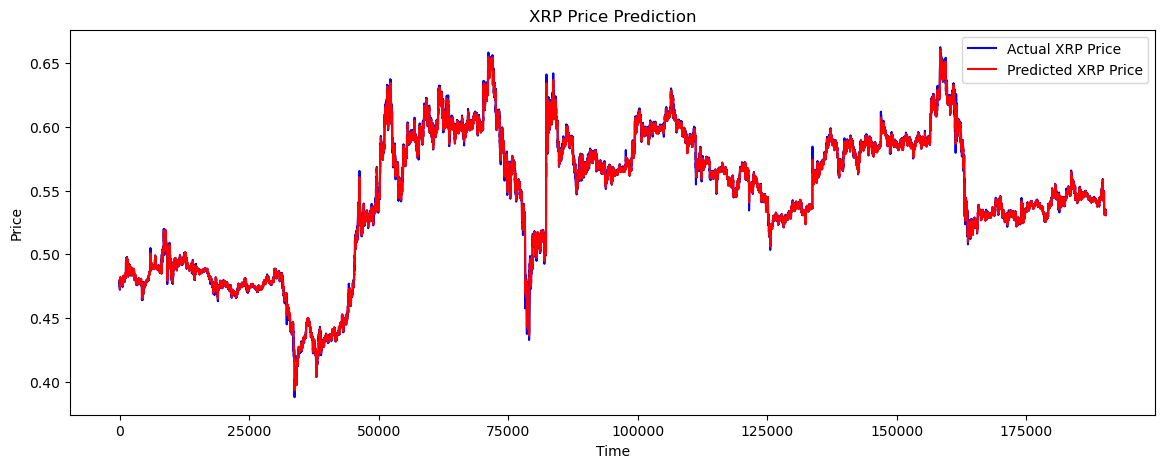

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# Build the LSTM model
model = Sequential()

# Adding the first LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the Model
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling to get actual values

# Inverse scaling for actual test data
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, color='blue', label='Actual XRP Price')
plt.plot(predictions, color='red', label='Predicted XRP Price')
plt.title('XRP Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Forecasting for the Next 10 Minutes
# Use the last 60 minutes from the dataset for forecasting
last_sequence = scaled_prices[-time_steps:]
forecast_input = np.array(last_sequence).reshape(1, time_steps, 1)

# Predict the next 10 minutes
forecast = []
for _ in range(10):
    predicted_price = model.predict(forecast_input)
    forecast.append(predicted_price[0][0])
    
    # Update the input with the new predicted value
    forecast_input = np.append(forecast_input[:, 1:, :], [[predicted_price]], axis=1)

# Inverse transform the predictions back to the original scale
forecast_prices = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Display the forecasted prices
print("Forecasted XRP Prices for the next 10 minutes:", forecast_prices)


In [47]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

# Memory growth configuration (allow TensorFlow to use GPU memory efficiently)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Step 1: Load and Combine Historical and Current Day Data
# Explanation: Check if historical and current day data exists, create current day data if missing, and combine them.

historical_file_2023 = r'E:\Data_Practice\xrp_rate_custom_2023-01-01_to_2024-01-01.csv'
historical_file_2024 = r'E:\Data_Practice\xrp_rate_custom_2024-01-01_to_2024-10-21.csv'
current_day_file = r'E:\Data_Practice\xrp_rates_live.csv'

# Load historical data
if os.path.exists(historical_file_2023) and os.path.exists(historical_file_2024):
    historical_data_2023 = pd.read_csv(historical_file_2023, parse_dates=['Timestamp'])
    historical_data_2024 = pd.read_csv(historical_file_2024, parse_dates=['Timestamp'])
else:
    raise FileNotFoundError("One of the historical data files is missing. Please check file paths for 2023 or 2024 data.")

# Check if the current day's data exists; if not, create a dummy file
if not os.path.exists(current_day_file):
    print("Current day data not found. Creating a dummy file...")
    dummy_data = pd.DataFrame({
        'Timestamp': pd.date_range(start='2024-10-22', periods=1440, freq='T'),  # Last 24 hours data
        'XRP Price': np.random.rand(1440) * 0.5 + 0.5  # Random XRP prices
    })
    dummy_data.to_csv(current_day_file, index=False)
    current_day_data = dummy_data
else:
    current_day_data = pd.read_csv(current_day_file, parse_dates=['Timestamp'])

# Ensure 'Timestamp' column is in datetime format for both historical and current data
historical_data_2023['Timestamp'] = pd.to_datetime(historical_data_2023['Timestamp'], errors='coerce')
historical_data_2024['Timestamp'] = pd.to_datetime(historical_data_2024['Timestamp'], errors='coerce')
current_day_data['Timestamp'] = pd.to_datetime(current_day_data['Timestamp'], errors='coerce')

# Combine historical and current day data
historical_data = pd.concat([historical_data_2023, historical_data_2024])
data = pd.concat([historical_data, current_day_data])

# Sort data by 'Timestamp' and reset index
data.sort_values(by='Timestamp', inplace=True)
data.reset_index(drop=True, inplace=True)

# Step 2: Data Preprocessing
# Explanation: Handle missing values, scale the 'XRP Price' column, and create sequences for LSTM input.

# Handling missing values
data.ffill(inplace=True)

# Extract only the 'XRP Price' (target column)
prices = data['XRP Price'].values.reshape(-1, 1)

# Scale the prices to a range between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Step 3: Creating Sequences
# Explanation: Create sequences from the scaled data (using the last 60 minutes of data to predict the next minute).

def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 60  # Using the last 60 minutes to predict the next one
X, y = create_sequences(scaled_prices, time_steps)

# Validation: Check the shape of sequences
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

# Step 4: Splitting Data for Training and Testing
# Explanation: Split the data into training (80%) and testing (20%) sets.

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Validation: Check the shapes of the train and test splits
print(f"Train X shape: {X_train.shape}, Train y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}, Test y shape: {y_test.shape}")

# Step 5: Building and Training the LSTM Model
# Explanation: Build the LSTM model with two LSTM layers and dropout for regularization, and train the model.

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model (allocate up to 70% memory, limit epochs to 5 for quicker training)
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Forecasting for the Next 10 Minutes
# Explanation: Use the model to forecast the next 10 minutes using the last 60 minutes of data.

# Use the last 60 minutes from the dataset for forecasting
last_sequence = scaled_prices[-time_steps:]
forecast_input = np.array(last_sequence).reshape(1, time_steps, 1)

# Validation: Ensure forecast_input shape is correct before entering the loop
print(f"Initial forecast_input shape: {forecast_input.shape}")

# Predict the next 10 minutes
forecast = []
for _ in range(10):
    # Predict the next price
    predicted_price = model.predict(forecast_input)

    # Append the predicted price to the forecast list (make sure it's the right shape)
    forecast.append(predicted_price[0][0])

    # Update the input with the new predicted value
    # Reshape predicted_price to (1, 1, 1) to match the input shape for the next iteration
    predicted_price_reshaped = np.array(predicted_price[0][0]).reshape(1, 1, 1)
    
    # Concatenate the new predicted value and drop the oldest value in the sequence
    forecast_input = np.append(forecast_input[:, 1:, :], predicted_price_reshaped, axis=1)

    # Validation: Check the shape of forecast_input after appending
    print(f"Updated forecast_input shape: {forecast_input.shape}")

# Inverse transform the predictions back to the original scale
forecast_prices = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Save the forecast to a CSV file
forecast_df = pd.DataFrame({
    'Timestamp': pd.date_range(start=data['Timestamp'].iloc[-1] + pd.Timedelta(minutes=1), periods=10, freq='T'),
    'XRP Price': forecast_prices.flatten()
})

output_file = r'E:\Data_Practice\xrp_forecast.csv'
forecast_df.to_csv(output_file, index=False)

print(f"Forecasted XRP Prices saved to {output_file}")



Shape of X: (953493, 60, 1), Shape of y: (953493, 1)
Train X shape: (762794, 60, 1), Train y shape: (762794, 1)
Test X shape: (190699, 60, 1), Test y shape: (190699, 1)


C:\Users\vjred\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
 7959/23838 ━━━━━━━━━━━━━━━━━━━━ 22:26 85ms/step - loss: 0.0012

KeyboardInterrupt: 

In [30]:
# Predict the next 10 minutes
forecast = []
for _ in range(10):
    # Predict the next price
    predicted_price = model.predict(forecast_input)

    # Append the predicted price to the forecast list (make sure it's the right shape)
    forecast.append(predicted_price[0][0])

    # Update the input with the new predicted value
    # Reshape predicted_price to (1, 1, 1) to match the input shape for the next iteration
    predicted_price_reshaped = np.array(predicted_price[0][0]).reshape(1, 1, 1)
    
    # Concatenate the new predicted value and drop the oldest value in the sequence
    forecast_input = np.append(forecast_input[:, 1:, :], predicted_price_reshaped, axis=1)

    # Validation: Check the shape of forecast_input after appending
    print(f"Updated forecast_input shape: {forecast_input.shape}")

# Inverse transform the predictions back to the original scale
forecast_prices = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Save the forecast to a CSV file
forecast_df = pd.DataFrame({
    'Timestamp': pd.date_range(start=data['Timestamp'].iloc[-1] + pd.Timedelta(minutes=1), periods=10, freq='T'),
    'XRP Price': forecast_prices.flatten()
})

output_file = r'E:\Data_Practice\xrp_forecast.csv'
forecast_df.to_csv(output_file, index=False)

print(f"Forecasted XRP Prices saved to {output_file}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Updated forecast_input shape: (1, 60, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Updated forecast_input shape: (1, 60, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Updated forecast_input shape: (1, 60, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Updated forecast_input shape: (1, 60, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Updated forecast_input shape: (1, 60, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Updated forecast_input shape: (1, 60, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Updated forecast_input shape: (1, 60, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Updated forecast_input shape: (1, 60, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Updated forecast_input shape: (1, 60, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Updated forecast_input shape: (1, 60, 1)
Forecasted XRP Prices saved to E:\Data_Practice\xrp_forecast.csv


C:\Users\vjred\AppData\Local\Temp\ipykernel_19700\1675278842.py:25: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  'Timestamp': pd.date_range(start=data['Timestamp'].iloc[-1] + pd.Timedelta(minutes=1), periods=10, freq='T'),


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import os

# Load the historical data
historical_data_path = r'E:\Data_Practice\xrp_rate_custom_2023-01-01_to_2024-01-01.csv'
current_day_data_path = r'E:\Data_Practice\xrp_rate_custom_2024-01-01_to_2024-10-21.csv'

# Load the datasets
historical_data = pd.read_csv(historical_data_path)
current_day_data = pd.read_csv(current_day_data_path)

# Combine the datasets
combined_data = pd.concat([historical_data, current_day_data], ignore_index=True)

# Check for missing values
if combined_data.isnull().sum().sum() > 0:
    print("Missing values found. Please handle them before proceeding.")

# Convert Timestamp to datetime
combined_data['Timestamp'] = pd.to_datetime(combined_data['Timestamp'])
combined_data.set_index('Timestamp', inplace=True)

# Select only the 'XRP Price' column for prediction
data = combined_data[['XRP Price']].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training and testing datasets
training_data_len = int(np.ceil(len(scaled_data) * 0.8))

# Create datasets for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define time step
time_step = 60  # Use last 60 minutes to predict the next minute
X, y = create_dataset(scaled_data, time_step)

# Reshape the data
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing datasets
X_train, y_train = X[:training_data_len], y[:training_data_len]
X_test, y_test = X[training_data_len:], y[training_data_len:]

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Set the checkpoint file path
checkpoint_filepath = r'E:\Data_Practice\lstm_checkpoint_weights.weights.h5'

# Print the model saving path
print(f"Saving model weights to: {checkpoint_filepath}")

# Define the checkpoint callback
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,
                             save_weights_only=True,
                             monitor='loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

# Train the model with the checkpoint callback
history = model.fit(X_train, y_train, epochs=5, batch_size=32, callbacks=[checkpoint])

# Load the weights from the last checkpoint (if exists)
if os.path.exists(checkpoint_filepath):
    model.load_weights(checkpoint_filepath)
    print("Loaded weights from the last checkpoint.")

# Save the model weights (final weights after training)
#final_weights_path = r'E:\Data_Practice\lstm_model_weights.h5'
#model.save_weights(final_weights_path)
#print(f"Final model weights saved to: {final_weights_path}")

# Save the model weights (final weights after training)
final_weights_path = r'E:\Data_Practice\lstm_model_weights.weights.h5'
model.save_weights(final_weights_path)
print(f"Final model weights saved to: {final_weights_path}")

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to original scale

# Plot the predictions against the true values
plt.figure(figsize=(14, 5))
plt.plot(data[training_data_len:], label='Actual Prices', color='blue')
plt.plot(np.arange(training_data_len + time_step + 1, training_data_len + time_step + len(predictions) + 1),
         predictions, label='Predicted Prices', color='red')
plt.title('XRP Price Prediction')
plt.xlabel('Time')
plt.ylabel('XRP Price')
plt.legend()
plt.show()


C:\Users\vjred\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Saving model weights to: E:\Data_Practice\lstm_checkpoint_weights.weights.h5
Epoch 1/5
23748/23748 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 5.5282e-04
Epoch 1: loss improved from inf to 0.00024, saving model to E:\Data_Practice\lstm_checkpoint_weights.weights.h5
23748/23748 ━━━━━━━━━━━━━━━━━━━━ 1790s 75ms/step - loss: 5.5281e-04
Epoch 2/5
23748/23748 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.5624e-04
Epoch 2: loss improved from 0.00024 to 0.00015, saving model to E:\Data_Practice\lstm_checkpoint_weights.weights.h5
23748/23748 ━━━━━━━━━━━━━━━━━━━━ 1746s 74ms/step - loss: 1.5624e-04
Epoch 3/5
23748/23748 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 1.4807e-04
Epoch 3: loss improved from 0.00015 to 0.00015, saving model to E:\Data_Practice\lstm_checkpoint_weights.weights.h5
23748/23748 ━━━━━━━━━━━━━━━━━━━━ 1678s 71ms/step - loss: 1.4807e-04
Epoch 4/5
23748/23748 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 1.4692e-04
Epoch 4: loss improved from 0.00015 to 0.00015, saving model to E:\Data_Pra

ValueError: The filename must end in `.weights.h5`. Received: filepath=E:\Data_Practice\lstm_model_weights.h5

In [37]:
# Reload the model architecture
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Load the previously saved weights
checkpoint_weights_path = r'E:\Data_Practice\lstm_checkpoint.weights.h5'
model.load_weights(checkpoint_weights_path)
print(f"Loaded weights from checkpoint: {checkpoint_weights_path}")

# Save the final model weights (to avoid the previous error)
final_weights_path = r'E:\Data_Practice\lstm_model_weights.weights.h5'
model.save_weights(final_weights_path)
print(f"Final model weights saved to: {final_weights_path}")

# Now continue with predictions
predictions = model.predict(X_test)


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'E:\Data_Practice\lstm_checkpoint.weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [38]:
# Rebuild the model architecture
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and save the weights after each epoch
checkpoint_weights_path = r'E:\Data_Practice\lstm_checkpoint.weights.h5'
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Save the final model weights
final_weights_path = r'E:\Data_Practice\lstm_model_weights.weights.h5'
model.save_weights(final_weights_path)
print(f"Final model weights saved to: {final_weights_path}")

# Continue with predictions
predictions = model.predict(X_test)


Epoch 1/5
 6537/23748 ━━━━━━━━━━━━━━━━━━━━ 18:55 66ms/step - loss: 0.0015

KeyboardInterrupt: 

In [39]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import os

# Rebuild the model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define paths for checkpoint and final weights
checkpoint_weights_path = r'E:\Data_Practice\lstm_checkpoint.weights.h5'
final_weights_path = r'E:\Data_Practice\lstm_model_weights.weights.h5'

# Check if checkpoint file exists to load weights and resume training
if os.path.exists(checkpoint_weights_path):
    model.load_weights(checkpoint_weights_path)
    print(f"Loaded weights from checkpoint: {checkpoint_weights_path}")
else:
    print("Checkpoint file not found. Starting training from scratch.")

# Train the model and save the weights after each epoch
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Save the final model weights
model.save_weights(final_weights_path)
print(f"Final model weights saved to: {final_weights_path}")

# Continue with predictions
predictions = model.predict(X_test)


Checkpoint file not found. Starting training from scratch.
Epoch 1/5
23748/23748 ━━━━━━━━━━━━━━━━━━━━ 1543s 65ms/step - loss: 6.1221e-04
Epoch 2/5
23748/23748 ━━━━━━━━━━━━━━━━━━━━ 1598s 67ms/step - loss: 1.5510e-04
Epoch 3/5
23748/23748 ━━━━━━━━━━━━━━━━━━━━ 1546s 65ms/step - loss: 1.4931e-04
Epoch 4/5
23748/23748 ━━━━━━━━━━━━━━━━━━━━ 1645s 68ms/step - loss: 1.4589e-04
Epoch 5/5
23748/23748 ━━━━━━━━━━━━━━━━━━━━ 1618s 68ms/step - loss: 1.4421e-04
Final model weights saved to: E:\Data_Practice\lstm_model_weights.weights.h5
5935/5935 ━━━━━━━━━━━━━━━━━━━━ 143s 24ms/step


In [63]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# File paths
historical_file_2023 = r'E:\Data_Practice\xrp_rate_custom_2023-01-01_to_2024-01-01.csv'
historical_file_2024 = r'E:\Data_Practice\xrp_rate_custom_2024-01-01_to_2024-10-21.csv'
current_day_file = r'E:\Data_Practice\xrp_rates_live.csv'
model_weights_file = r'E:\Data_Practice\lstm_model_weights.h5'  # Change to .keras extension

# Step 1: Load and Combine Historical and Current Day Data
if os.path.exists(historical_file_2023) and os.path.exists(historical_file_2024):
    historical_data_2023 = pd.read_csv(historical_file_2023, parse_dates=['Timestamp'])
    historical_data_2024 = pd.read_csv(historical_file_2024, parse_dates=['Timestamp'])
    historical_data = pd.concat([historical_data_2023, historical_data_2024])
else:
    raise FileNotFoundError("One of the historical data files is missing.")

if not os.path.exists(current_day_file):
    print("Current day data not found. Creating a dummy file...")
    dummy_data = pd.DataFrame({
        'Timestamp': pd.date_range(start='2024-10-22', periods=1440, freq='T'),
        'XRP Price': np.random.rand(1440) * 0.5 + 0.5
    })
    dummy_data.to_csv(current_day_file, index=False)
    current_day_data = dummy_data
else:
    current_day_data = pd.read_csv(current_day_file, parse_dates=['Timestamp'])

# Ensure 'Timestamp' column is in datetime format
historical_data['Timestamp'] = pd.to_datetime(historical_data['Timestamp'], errors='coerce')
current_day_data['Timestamp'] = pd.to_datetime(current_day_data['Timestamp'], errors='coerce')

# Step 2: Preprocess Historical Data for Training
def preprocess_for_training(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data[['XRP Price']])
    X, y = [], []
    for i in range(60, len(scaled_data)):
        X.append(scaled_data[i-60:i])
        y.append(scaled_data[i])
    return np.array(X), np.array(y), scaler

# Load and preprocess historical data
X_train, y_train, scaler = preprocess_for_training(historical_data)

# Step 3: Build the LSTM Model
def build_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 4: Load or Build the LSTM Model
model = None
if os.path.exists(model_weights_file):
    model = load_model(model_weights_file)
else:
    model = build_model()
    # Add ModelCheckpoint to save weights during training
    checkpoint = ModelCheckpoint(model_weights_file, monitor='loss', save_best_only=True)
    model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, 
              epochs=50, batch_size=32, callbacks=[checkpoint])

# Step 5: Forecast Current Day Data
def preprocess_for_prediction(data):
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    data.set_index('Timestamp', inplace=True)
    scaled_data = scaler.transform(data[['XRP Price']])
    X = []
    for i in range(60, len(scaled_data)):
        X.append(scaled_data[i-60:i])
    return np.array(X)

# Preprocess current day data for prediction
X_current = preprocess_for_prediction(current_day_data)

# Step 6: Make Predictions
predictions = model.predict(X_current.reshape(X_current.shape[0], X_current.shape[1], 1))

# Inverse transform to get actual price predictions
predicted_prices = scaler.inverse_transform(predictions)

# Step 7: Save the Forecast
def save_forecast(predictions):
    forecast_file = r'E:\Data_Practice\xrp_forecast.csv'
    forecast_df = pd.DataFrame(predicted_prices, columns=['Predicted XRP Price'])
    forecast_df.to_csv(forecast_file, index=False)

# Save the forecast
save_forecast(predicted_prices)


C:\Users\vjred\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=E:\Data_Practice\lstm_model_weights.h5

In [66]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint

# Define the file paths
historical_file_2023 = r'E:\Data_Practice\xrp_rate_custom_2023-01-01_to_2024-01-01.csv'
historical_file_2024 = r'E:\Data_Practice\xrp_rate_custom_2024-01-01_to_2024-10-21.csv'
current_day_file = r'E:\Data_Practice\xrp_rates_live.csv'
model_weights_file = r'E:\Data_Practice\lstm_model_weights.h5'

# Step 1: Load and Combine Historical Data
def load_historical_data():
    if os.path.exists(historical_file_2023) and os.path.exists(historical_file_2024):
        historical_data_2023 = pd.read_csv(historical_file_2023, parse_dates=['Timestamp'])
        historical_data_2024 = pd.read_csv(historical_file_2024, parse_dates=['Timestamp'])
        combined_data = pd.concat([historical_data_2023, historical_data_2024], ignore_index=True)
        print("Loaded historical data successfully.")
        return combined_data
    else:
        raise FileNotFoundError("One of the historical data files is missing.")

# Step 2: Preprocess data for training
def preprocess_for_training(data):
    # Example preprocessing: extract features and target variable
    data = data[['Timestamp', 'XRP Price']]  # Adjust based on your column names
    data['XRP Price'] = data['XRP Price'].astype(float)  # Ensure correct data type
    # Additional preprocessing steps here (e.g., normalization, feature engineering)
    
    # Create the dataset for LSTM
    X, y = [], []
    for i in range(len(data) - 1):
        X.append(data['XRP Price'].iloc[i])  # Use the price at time t
        y.append(data['XRP Price'].iloc[i + 1])  # Use the price at time t+1
    
    X = np.array(X)
    y = np.array(y)

    # Reshape X to be [samples, time steps, features]
    X = X.reshape((X.shape[0], 1, 1))  # 1 time step and 1 feature
    return X, y

# Load historical data
historical_data = load_historical_data()
if historical_data.empty:
    raise ValueError("Cannot proceed with training as historical data is empty.")

# Preprocess data
X_train, y_train = preprocess_for_training(historical_data)

# Check if training data is empty
if len(X_train) == 0 or len(y_train) == 0:
    raise ValueError("Training data is empty after preprocessing.")

# Step 3: Build the model
def build_model():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, 1)))  # Expecting (time steps, features)
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

model = build_model()


# Step 4: Check if weights exist and load them
if os.path.exists(model_weights_file):
    print("Loading existing model weights...")
    model.load_weights(model_weights_file)
else:
    print("Weights file not found. Starting training from scratch.")

# Step 5: Add ModelCheckpoint to save weights during training
checkpoint = ModelCheckpoint(model_weights_file, monitor='loss', save_best_only=True)

# Train the model
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train,
          epochs=50, batch_size=32, callbacks=[checkpoint])

# Step 6: Forecast Current Day Data


Loaded historical data successfully.
Weights file not found. Starting training from scratch.


C:\Users\vjred\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=E:\Data_Practice\lstm_model_weights.h5

In [80]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint

# Define the file paths
historical_file_2023 = r'E:\Data_Practice\xrp_rate_custom_2023-01-01_to_2024-01-01.csv'
historical_file_2024 = r'E:\Data_Practice\xrp_rate_custom_2024-01-01_to_2024-10-21.csv'
current_day_file = r'E:\Data_Practice\xrp_rates_live.csv'
model_weights_file = r'E:\Data_Practice\lstm_checkpoint_weights.weights.h5'
model_file = r'E:\Data_Practice\lstm_model.h5'

# Step 1: Load and Combine Historical Data and Current Day Data
def load_data():
    historical_data = pd.DataFrame()
    if os.path.exists(historical_file_2023) and os.path.exists(historical_file_2024):
        historical_data_2023 = pd.read_csv(historical_file_2023, parse_dates=['Timestamp'])
        historical_data_2024 = pd.read_csv(historical_file_2024, parse_dates=['Timestamp'])
        historical_data = pd.concat([historical_data_2023, historical_data_2024], ignore_index=True)
        print("Loaded historical data successfully.")

    if os.path.exists(current_day_file):
        current_day_data = pd.read_csv(current_day_file, parse_dates=['Timestamp'])
        historical_data = pd.concat([historical_data, current_day_data], ignore_index=True)
        print("Loaded current day data successfully.")

    if historical_data.empty:
        raise ValueError("Cannot proceed as combined data is empty.")

    return historical_data

# Step 2: Preprocess data for training
def preprocess_for_training(data):
    data = data[['Timestamp', 'XRP Price']]
    data['XRP Price'] = data['XRP Price'].astype(float)
    
    # Use a sliding window approach to create sequences
    X, y = [], []
    window_size = 10  # Adjust based on how many past values to consider
    for i in range(len(data) - window_size):
        X.append(data['XRP Price'].iloc[i:i + window_size].values)
        y.append(data['XRP Price'].iloc[i + window_size])
    
    X = np.array(X)
    y = np.array(y)
    
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y

# Load data
historical_data = load_data()

# Preprocess data
X_train, y_train = preprocess_for_training(historical_data)

# Step 3: Build the model
def build_model():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

model = build_model()

# Step 4: Check if weights exist and load them
initial_epoch = 0
if os.path.exists(model_weights_file):
    print("Loading existing model weights...")
    model.load_weights(model_weights_file)
else:
    print("Weights file not found. Starting training from scratch.")

# Step 5: Add ModelCheckpoint to save weights during training
checkpoint = ModelCheckpoint(model_weights_file, monitor='loss', save_best_only=True, save_weights_only=True)

# Train the model, resume from the last epoch
model.fit(X_train, y_train,
          epochs=10, batch_size=32, callbacks=[checkpoint], initial_epoch=initial_epoch)

# Save the entire model
model.save(model_file)

# Step 6: Forecasting for the next 5 minutes
def forecast_next_minutes(model, last_data, n_minutes=5):
    predictions = []
    current_data = last_data[-1]  # Start with the last known window

    for _ in range(n_minutes):
        next_prediction = model.predict(current_data.reshape((1, current_data.shape[0], 1)))
        predictions.append(next_prediction[0, 0])
        
        # Update current_data by appending the new prediction and removing the oldest value
        current_data = np.append(current_data[1:], next_prediction)

    return predictions

# Make predictions for the next 5 minutes
next_5_minutes_predictions = forecast_next_minutes(model, X_train[-1], n_minutes=5)

# Step 7: Save the forecasted values to a CSV file
forecast_df = pd.DataFrame(next_5_minutes_predictions, columns=['Forecasted XRP Price'])
forecast_df['Timestamp'] = pd.date_range(start=pd.Timestamp.now(), periods=5, freq='T')
forecast_file = r'E:\Data_Practice\forecasted_xrp_prices.csv'
forecast_df.to_csv(forecast_file, index=False)

print(f"Forecasted values for the next 5 minutes saved to: {forecast_file}")


Loaded historical data successfully.
Loaded current day data successfully.


C:\Users\vjred\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Loading existing model weights...


C:\Users\vjred\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
29805/29805 ━━━━━━━━━━━━━━━━━━━━ 267s 9ms/step - loss: 5.2967e-07
Epoch 2/10
29805/29805 ━━━━━━━━━━━━━━━━━━━━ 263s 9ms/step - loss: 4.8461e-07
Epoch 3/10
29805/29805 ━━━━━━━━━━━━━━━━━━━━ 240s 8ms/step - loss: 4.9517e-07
Epoch 4/10
29805/29805 ━━━━━━━━━━━━━━━━━━━━ 265s 9ms/step - loss: 4.8898e-07
Epoch 5/10
29805/29805 ━━━━━━━━━━━━━━━━━━━━ 247s 8ms/step - loss: 4.7460e-07
Epoch 6/10
29805/29805 ━━━━━━━━━━━━━━━━━━━━ 259s 9ms/step - loss: 4.7495e-07
Epoch 7/10
29805/29805 ━━━━━━━━━━━━━━━━━━━━ 264s 9ms/step - loss: 4.6838e-07
Epoch 8/10
29805/29805 ━━━━━━━━━━━━━━━━━━━━ 215s 7ms/step - loss: 4.6795e-07
Epoch 9/10
29805/29805 ━━━━━━━━━━━━━━━━━━━━ 195s 7ms/step - loss: 4.7513e-07
Epoch 10/10
29805/29805 ━━━━━━━━━━━━━━━━━━━━ 204s 7ms/step - loss: 4.6007e-07


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Forecasted values for the next 5 minutes saved to: E:\Data_Practice\forecasted_xrp_prices.csv


C:\Users\vjred\AppData\Local\Temp\ipykernel_19700\1282178097.py:105: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  forecast_df['Timestamp'] = pd.date_range(start=pd.Timestamp.now(), periods=5, freq='T')


In [ ]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import time
import warnings
from datetime import datetime

# Suppress warnings
warnings.filterwarnings("ignore")

# Define the file paths
historical_file_2023 = r'E:\Data_Practice\xrp_rate_custom_2023-01-01_to_2024-01-01.csv'
historical_file_2024 = r'E:\Data_Practice\xrp_rate_custom_2024-01-01_to_2024-10-21.csv'
current_day_file = r'E:\Data_Practice\xrp_rates_live.csv'
model_weights_file = r'E:\Data_Practice\lstm_checkpoint_weights.weights.h5'
model_file = r'E:\Data_Practice\lstm_model.h5'
forecast_file = r'E:\Data_Practice\xrp_forecast.csv'

# Load and combine historical data
def load_historical_data():
    """
    Load and combine historical data from 2023 and 2024.
    Raises a FileNotFoundError if any of the files are missing.
    """
    if os.path.exists(historical_file_2023) and os.path.exists(historical_file_2024):
        historical_data_2023 = pd.read_csv(historical_file_2023, parse_dates=['Timestamp'])
        historical_data_2024 = pd.read_csv(historical_file_2024, parse_dates=['Timestamp'])
        combined_data = pd.concat([historical_data_2023, historical_data_2024], ignore_index=True)
        print("Loaded historical data successfully.")
        return combined_data
    else:
        raise FileNotFoundError("One of the historical data files is missing.")

# Preprocess data for training
def preprocess_for_training(data):
    """
    Preprocess the data for training.
    Returns the features (X) and target (y) arrays for the LSTM model.
    """
    data['XRP Price'] = data['XRP Price'].astype(float)
    X, y = [], []
    for i in range(len(data) - 1):
        X.append(data['XRP Price'].iloc[i])
        y.append(data['XRP Price'].iloc[i + 1])
    
    X = np.array(X).reshape((-1, 1, 1))  # Shape for LSTM
    return X, np.array(y)

# Build the LSTM model
def build_model():
    """
    Build the LSTM model with a specified architecture.
    Returns the compiled model.
    """
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Forecasting function
def forecast_next_minutes(model, last_price, n_minutes=5):
    """
    Forecast the next n minutes of XRP prices using the trained model.
    Returns a list of predicted prices.
    """
    predictions = []
    current_data = np.array(last_price).reshape((1, 1, 1))
    for _ in range(n_minutes):
        next_prediction = model.predict(current_data)
        predictions.append(next_prediction[0, 0])
        current_data = next_prediction.reshape((1, 1, 1))
    return predictions

# Function to append forecast with processed time and save to CSV
def save_forecast_with_timestamp(forecast_df):
    """
    Append the processed_time column with the current timestamp and save to CSV.
    """
    forecast_df['processed_time'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    # Append mode if file exists, otherwise create a new file
    if os.path.exists(forecast_file):
        forecast_df.to_csv(forecast_file, mode='a', header=False, index=False)
    else:
        forecast_df.to_csv(forecast_file, index=False)
    print(f"Forecast saved with processed time to {forecast_file}.")

# Main loop for continuous forecasting
def run_forecasting_loop():
    """
    Main loop to continually forecast XRP prices every 5 minutes.
    Loads historical data, trains the model, and makes predictions using live data.
    """
    # Load historical data
    historical_data = load_historical_data()
    X_train, y_train = preprocess_for_training(historical_data)

    # Build the LSTM model
    model = build_model()

    # Check if weights exist and load them
    if os.path.exists(model_weights_file):
        print("Loading existing model weights...")
        model.load_weights(model_weights_file)

    # Callbacks for checkpointing and early stopping
    checkpoint = ModelCheckpoint(model_weights_file, save_best_only=True, save_weights_only=True)
    early_stopping = EarlyStopping(monitor='loss', patience=5)  # Stop if no improvement for 5 epochs

    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=32, callbacks=[checkpoint, early_stopping])
    model.save(model_file)

    while True:
        # Load current day data
        current_day_data = pd.read_csv(current_day_file, parse_dates=['Timestamp'])
        
        # Check if data is available
        if not current_day_data.empty:
            latest_price = current_day_data['XRP Price'].iloc[-1]
            next_5_minutes_predictions = forecast_next_minutes(model, latest_price)

            # Save forecasted values with processed_time
            forecast_df = pd.DataFrame(next_5_minutes_predictions, columns=['Forecasted XRP Price'])
            forecast_df['Timestamp'] = pd.date_range(start=pd.Timestamp.now(), periods=5, freq='T')
            save_forecast_with_timestamp(forecast_df)

            # Display the last run time
            last_run_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            print(f"Forecasted values for the next 5 minutes saved to: {forecast_file}")
            print(f"Last run time: {last_run_time}")
        else:
            print("Current day data is empty. Please check the input file.")
        
        # Further training on current day data
        X_live, y_live = preprocess_for_training(current_day_data)
        model.fit(X_live, y_live, epochs=1, batch_size=32, callbacks=[checkpoint, early_stopping])

        # Wait for 5 minutes before the next forecast
        time.sleep(300)  # Sleep for 5 minutes

# Run the forecasting loop
if __name__ == "__main__":
    run_forecasting_loop()
